### Sprint #2: Data

DS4003 | Spring 2024

The objective of this sprint is to locate suitable data for the term project and then clean and prepare this data using the pandas library in Python. This will ensure the data is ready for subsequent analysis and visualization steps. Additionally you will list ideas for UI components and possible data visualizations to build.

**Instructions**

1. Research and find a suitable dataset for your term project. The dataset should be rich enough to allow for interesting analysis and visualizations.

2. Once you have located your dataset, download it and import it into a Python environment in Jupyter Notebook.

3. The first section of your notebook should include why you chose this data and data provenance.

4. Use the pandas library to clean and prepare your data. This may include dealing with missing values, converting data types, or restructuring the data as necessary. By the end your data should be ‘tidy’ data. Links to an external site.

5. After your data is cleaned, complete an exploratory analysis of your data. Depending on your data, this may include things like:

- How many observations do you have?
- How many unique categories are there for categorical variables?
- How much missing data is there per observation or per variable?
- What are the distributions of continuous variables? Are there outliers?

6. At the end of your data exploration, include a data dictionary.

7. Finally, brainstorm a list of UI components that you could include in your dashboard. Consider what would be most useful or interesting for users.

8. Also brainstorm a list 3-6 possible data visualizations (e.g., a scatter plot of sepal length vs sepal width - this could be filtered on species using a multi-select dropdown)

**Deliverables**

In a GitHub Repo:

- Your cleaned and prepared dataset in a csv file called data.csv
- In a single Jupyter Notebook:
   - Your exploratory analysis, including code and commentary
   - A list of potential UI components for your dashboard
   - A list of potential data visualizations for your dashboard


### Data and Data Provenance

I chose to this data, which looks at used cars, because I felt I would need to move away from my first idea of budgeting as I couldn't find any data I liked enough to use. A plus is that I really like cars. However, I feel like this data is definitely relevant to the personas I created, I would just need to tweak them a little, as well as close enough to my original idea that it isn't such a drastic pivot. The dataset itself is named Used Car Price Prediction Dataset. I got the dataset from Kaggle and the data was scraped from https://www.cars.com. 

### Data Wrangling

In [615]:
#import dependencies
import pandas as pd
import numpy as np

In [616]:
#read in csv file
df = pd.read_csv('used_cars.csv')

#print out head
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [617]:
#looking at brand variable
df['brand'].value_counts()

def capitalize_brand(brand):
    if brand.lower() in ['bmw', 'ram', 'gmc', 'infiniti']:
        return brand.upper()
    elif brand.lower() == 'mini':
        return 'mini'
    else:
        return brand.capitalize()
df['brand'] = df['brand'].apply(capitalize_brand)

#checking dataset now
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
mini              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-royce       11
Aston              9
Mclaren            6
Scion              6
Fiat               5
Saturn             5
Lotus              4
Lucid  

In [618]:
#making sure every brand except BMW, RAM, GMC, INFINITI, MINI, and mini has standard capitalization
def capitalize_name(brand):
    if brand.lower() in ['bmw', 'ram', 'gmc', 'infiniti']:
        return brand.upper()
    elif brand.lower() == 'mini':
        return 'mini'
    else:
        return brand.capitalize()
df['brand'] = df['brand'].apply(capitalize_name)

#drop rows with 'â€“' in brand column
df = df[~df['brand'].str.contains('â€“')]

#drop NaN values since you can't identify car
df.dropna(subset=['brand'], inplace=True)


#checking dataset now
df['brand'].value_counts()


brand
Ford             386
BMW              375
Mercedes-benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
mini              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-royce       11
Aston              9
Mclaren            6
Scion              6
Fiat               5
Saturn             5
Lotus              4
Lucid  

In [619]:
#remove police models since average person can't buy them
df = df[~df['model'].str.contains('Police', case=False)]

#drop rows with 'â€“' in model column
df = df[~df['model'].str.contains('â€“')]

#drop NaN values since you can't identify model
df.dropna(subset=['model'], inplace=True)


#checking head 
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"


In [620]:
#making sure model year is type numeric
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')

#checking for nan values after conversion, making sure sum is zero meaning there are no non numeric numbers
print(df['model_year'].isnull().sum())

0


In [621]:
#rename milage column to mileage
df.rename(columns={'milage': 'mileage'}, inplace=True)

#checking if rename worked
df.head()

,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"


In [622]:
#remove commas and "mi." from mileage column
df['mileage'] = df['mileage'].str.replace(',', '').str.replace('mi.', '')

#convert 'mileage' column to numeric
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

#checking for nan values after conversion, making sure sum is zero
print(df['mileage'].isnull().sum())

0


In [623]:
#checking if comma and mi. was removed
df.head()

,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,136397,Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"


In [624]:
#drop rows with NaN values in fuel_type column
df.dropna(subset=['fuel_type'], inplace=True)

#drop rows with 'â€“' in fuel_type column
df = df[~df['fuel_type'].str.contains('â€“')]

#print df to see if it worked
print(df)

              brand                      model  model_year  mileage fuel_type  \
1           Hyundai               Palisade SEL        2021    34742  Gasoline   
2             Lexus              RX 350 RX 350        2022    22372  Gasoline   
3          INFINITI           Q50 Hybrid Sport        2015    88900    Hybrid   
4              Audi  Q3 45 S line Premium Plus        2021     9835  Gasoline   
5             Acura                   ILX 2.4L        2016   136397  Gasoline   
...             ...                        ...         ...      ...       ...   
4003  Mercedes-benz       E-Class E 300 4MATIC        2018    53705  Gasoline   
4004        Bentley       Continental GT Speed        2023      714  Gasoline   
4005           Audi       S4 3.0T Premium Plus        2022    10900  Gasoline   
4007           Ford               F-150 Raptor        2020    33000  Gasoline   
4008            BMW               X3 xDrive30i        2020    43000  Gasoline   

                           

In [625]:
df.head()

,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,136397,Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"


In [626]:
#remove engine column since I think it's irrelevant to my data
#most people don't care about the type of engine their car has
df.drop(columns=['engine'], inplace=True)
df.head()

,brand,model,model_year,mileage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,136397,Gasoline,F,Silver,Ebony.,None reported,NaN,"$14,798"


In [627]:
#looking at transmission, removing anything that isn't automatic or manual, and converting "A/T" to automatic and "M/T" to manual. 
#replace values containing "A/T" or "Automatic" with "Automatic"
df.loc[df['transmission'].str.contains('A/T|Automatic', case=False, na=False), 'transmission'] = 'Automatic'

#replace values containing "M/T" or "Manual" to Manual
df.loc[df['transmission'].str.contains('M/T|Manual', case=False, na=False), 'transmission'] = 'Manual'

#remove rows that aren't automatic, manual, or transmission w/ dual shift mode this is because these are the most common transmission types the average driver is aware of 
transmissions = ['Manual', 'Transmission w/Dual Shift Mode', 'Automatic']
df = df[df['transmission'].isin(transmissions)]

#drop rows with 'â€“' in transmission column
df = df[~df['transmission'].str.contains('â€“')]

#drop NaN values in transmission column
df.dropna(subset=['transmission'], inplace=True)


#print head to make sure manual worked as well
df.head(50)

,brand,model,model_year,mileage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,242000,Gasoline,Automatic,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,Automatic,Black,Black,None reported,Yes,"$41,927"
10,Land,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608,Gasoline,Automatic,Fuji White,Pimento / Ebony,None reported,NaN,"$73,897"
11,Aston,Martin DBS Superleggera,2019,22770,Gasoline,Automatic,Silver,Black,None reported,Yes,"$184,606"
12,Toyota,Supra 3.0 Premium,2021,12500,Gasoline,Automatic,Yellow,Black,None reported,Yes,"$53,500"


In [628]:
df.head()

,brand,model,model_year,mileage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,"$31,000"


In [629]:
#make sure exterior colors all have same capitalization
df['ext_col'] = df['ext_col'].str.capitalize()

#removing NaN and special characters
df.dropna(subset=['ext_col'], inplace=True)
df = df[~df['ext_col'].str.contains('â€“')]

#make sure interior colors all have same capitalization
df['int_col'] = df['int_col'].str.capitalize()

#removing NaN and special characters
df.dropna(subset=['int_col'], inplace=True)
df = df[~df['int_col'].str.contains('â€“')]


In [630]:
df.head()

,brand,model,model_year,mileage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,Automatic,Moonlight cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,Automatic,Glacier white metallic,Black,None reported,NaN,"$34,999"
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,"$31,000"


In [631]:
#drop rows with NaN values for accident because that heavily impacts whether someone buys a used car or not
df.dropna(subset=['accident'], inplace=True)

#drop rows with 'â€“' in accident column
df = df[~df['accident'].str.contains('â€“')]



In [632]:
df.head()

,brand,model,model_year,mileage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,Automatic,Moonlight cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,Automatic,Glacier white metallic,Black,None reported,NaN,"$34,999"
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,"$31,000"


In [633]:
#remove nan for clean_title since that also heavily impacts whether someone buys a car
df.dropna(subset=['clean_title'], inplace=True)

#drop rows with 'â€“' in clean_title column
df = df[~df['clean_title'].str.contains('â€“')]

#print head
df.head()

,brand,model,model_year,mileage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,Automatic,Moonlight cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,"$15,500"
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,242000,Gasoline,Automatic,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,Automatic,Black,Black,None reported,Yes,"$41,927"


In [634]:
#remove nan from price because you can't see how much car costs
df.dropna(subset=['price'], inplace=True)

#drop rows with 'â€“' in price column
df = df[~df['price'].str.contains('â€“')]

#remove commas, and $ from price to make it numeric
df['price'] = df['price'].str.replace(',', '').str.replace('$', '')

# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

#set a price cutoff point of 200,000 since a car is listed at nearly 3 million dollars
df = df[df['price'] <= 200000]
#view head
df.head()

,brand,model,model_year,mileage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price
1,Hyundai,Palisade SEL,2021,34742,Gasoline,Automatic,Moonlight cloud,Gray,At least 1 accident or damage reported,Yes,38005
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,15500
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,31000
7,BMW,740 iL,2001,242000,Gasoline,Automatic,Green,Green,None reported,Yes,7300
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,Automatic,Black,Black,None reported,Yes,41927


### EDA

In [635]:
# check number of rows using shape
rows = df.shape[0]

#print number of rows
print(rows)

3148


In [636]:
#checking number of unique categories for each categorical variable using for loop
for column in df.columns:
    if df[column].dtype == 'object':
        num_unique_categories = df[column].nunique()
        print(f"{column}' has {num_unique_categories} unique categories")

brand' has 51 unique categories
model' has 1555 unique categories
fuel_type' has 7 unique categories
transmission' has 3 unique categories
ext_col' has 110 unique categories
int_col' has 66 unique categories
accident' has 2 unique categories
clean_title' has 1 unique categories


In [637]:
#show descriptive statistics of each continuous variable 
print("Descriptive statistics for model_year:")
print(df['model_year'].describe())

print("\nDescriptive statistics for mileage:")
print(df['mileage'].describe())

print("\nDescriptive statistics for price:")
print((df['price']).describe())

Descriptive statistics for model_year:
count   3148.00
mean    2014.51
std        6.14
min     1992.00
25%     2011.00
50%     2016.00
75%     2019.00
max     2024.00
Name: model_year, dtype: float64

Descriptive statistics for mileage:
count     3148.00
mean     72987.26
std      53025.34
min        100.00
25%      31575.00
50%      63478.00
75%     103556.50
max     399000.00
Name: mileage, dtype: float64

Descriptive statistics for price:
count     3148.00
mean     35247.71
std      29058.10
min       2000.00
25%      15499.00
50%      27995.00
75%      45791.25
max     200000.00
Name: price, dtype: float64


Looking at the descriptive statistics, you can see a couple outliers for each. For model year, the average year of car was 2014 and someone has a car listed from 1992 a car listed that was made in 2024 which is interesting. Looking at mileage, the average mileage of these used cars is 72,040 miles and someone is listing a car with nearly 400,000 miles which is a very insane outlier. On the opposite side, someone is a listing a car with only 100 miles on it which is also very extreme. This makes sense though because people buy very expensive cars and barely drive them then sell them. Lastly, regarding price, there are extreme outliers as well someone is listing a car for only 2,000 dollars. It's important to note that for teh price variable, I included a cut off price of 200,000 dollars since (1) the average person isn't buying a car for 200,000 let alone a used car and (2) not including a cut off was messing up my histogram visualization which can be seen below as there was a listing for 3 million dollars which was making my graph unreadable.

In [638]:
#import dependencies for plotting
import matplotlib.pyplot as plt

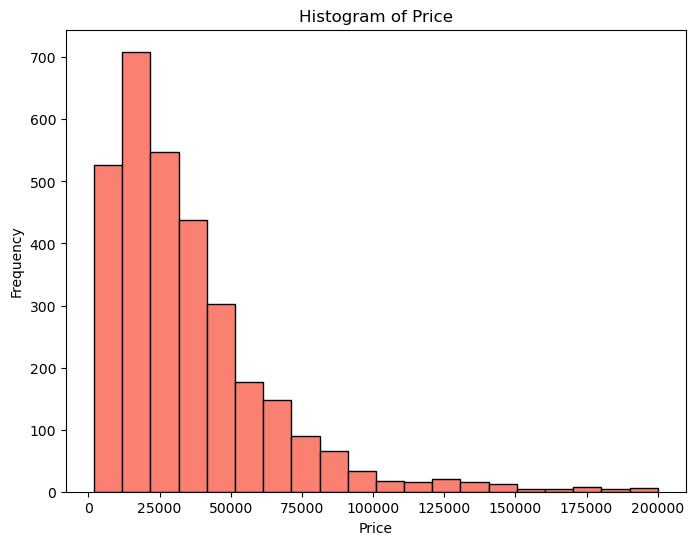

In [639]:
#histogram of price
# Create histogram of Price
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The graph is positively skewed with the most frequent price of a listing being in the 20,000 dollar range. This makes sense because the average person is not looking to pay a lot for a used car though there are some exceptions as there are some cars listed past the hundreds of thousands, assuming that some may be inclined to pay that much. 

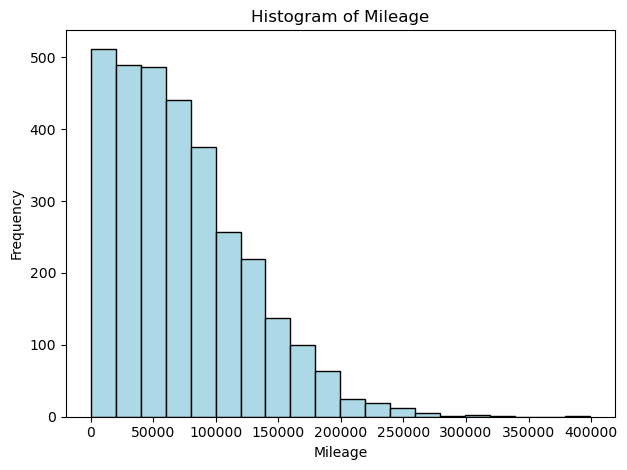

In [640]:
#histogram of mileage
plt.hist(df['mileage'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

#show plot
plt.tight_layout()
plt.show()

The histogram shows a few outliers for mileage and is positively skewed which makes sense because most people would want to buy cars with lower mileage.

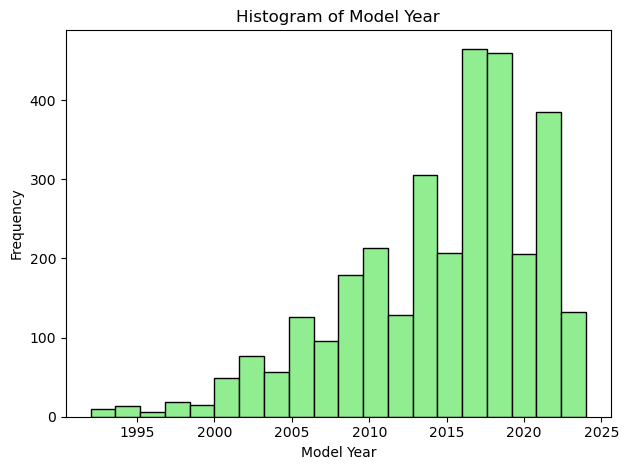

In [641]:
#histogram for model year
plt.hist(df['model_year'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')

#show plot
plt.tight_layout()
plt.show()

The histogram for model year is negatively skewed which makes sense because people would want to be looking for and buying newer cars.

### Data Dictionary
1. brand: car brand name
2. model: car model name
3. model_year: car model year
4. mileage: mileage number
5. fuel_type: fuel type of car
6. transmission: transmission of car
7. ext_col: exterior color of car
8. int_col: interior color of car
9. accident: whether or not an accident was reported
10. clean_title: if car title is clean
11. price: car price

### Brainstorming 

**List of UI Components I can include in my Dashboard** 
1. Range Sliders for price and mileage
2. Dropdown menus for filtering between brands and models
3. Search bar for looking for specific car models and brands

**List of Possible Data Visualizations**
1. Bar Chart to show distribution of cars by different variables
2. Line Chart to show trends in price or mileage over years
3. Pie Chart to show proportion of cars by variables like fuel type or transmission


In [642]:
#upload dataset to csv
df.to_csv('data.csv', index=False)